# Notebook para exemplificar como realizar uma análise envolvendo Python e SQL.

O banco de dados utilizado é o MySQL. A base de dados armazena informações de produtos, categorias, pedidos e fornecedores. O script com os comandos para criar as tabelas está no arquivo `schema.sql`, e os dados para inserção estão no arquivo `data.sql`.

Serão realizadas duas análises:

1. Quantos pedidos cada fornecedor atendeu; e
1. Quanto cada produto rendeu em faturamento.

## Importa as bibliotecas que serão utilizadas.

* A **SQL Alchemy** é usada para comunicação e consulta com o banco de dados;
* A **Pandas** é utilizada, neste notebook, somente para criar os dataframes com os dados do banco;
* A **Matplotlib** é utilizada para plotar gráficos.

In [2]:
from sqlalchemy import create_engine, text

import pandas as pd
import matplotlib.pyplot as plt

## Cria a *string* com as informações para se conectar com o banco de dados e cria a Engine da SQLAlchemy de onde obtém-se conexões

In [3]:
string_de_conexao = "mysql+mysqlconnector://localhost:3307/ambev_pedidos"
engine = create_engine(string_de_conexao)

## Análise 1: Quantos pedidos cada fornecedor atendeu?

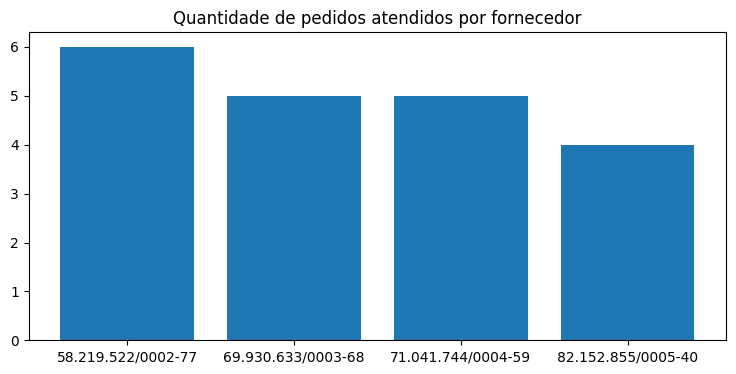

In [4]:
# string com a consulta a ser realizada no banco de dados
query = '''select cnpj_fornecedor fornecedor, count(*) quantidade_pedidos
             from pedido
            group by cnpj_fornecedor
            order by count(*) desc;
        '''

# conecta no banco, realiza a consulta e pega os dados
with engine.connect() as conexao:
    resultado = conexao.execute(text(query))
    dados = resultado.mappings()

# cria o datagrame do Pandas com os dados do banco
df_pedidos_atendidos = pd.DataFrame(dados)

#plota o gráfico
plt.figure(figsize=((9, 4)))
plt.bar(df_pedidos_atendidos['fornecedor'], df_pedidos_atendidos['quantidade_pedidos'])
plt.title('Quantidade de pedidos atendidos por fornecedor')
plt.show()

([<matplotlib.patches.Wedge at 0x13a4a0910>,
 [Text(1.084900196289091, 0.181635800688884, 'Água'),
  Text(0.8922969046597614, 0.6432777269069782, 'Guaraná Antártica'),
  Text(0.2837519779357012, 1.0627722310154597, 'Eisenbahn'),
  Text(-0.5699156830568664, 0.9408486138618826, 'Coca Cola'),
  Text(-1.0943251953978534, 0.1115901730326203, 'Heineken'),
  Text(-0.609285004597375, -0.9158448466704264, 'Colorado Appia'),
  Text(0.7727254303814168, -0.78287636906593, 'Red Bull')],
 [Text(0.7890183245738843, 0.13209876413737018, 'R$ 2.825,00\n(5.28%)'),
  Text(0.6489432033889173, 0.46783834684143866, 'R$ 4.987,50\n(9.32%)'),
  Text(0.20636507486232816, 0.7729252589203343, 'R$ 6.682,50\n(12.49%)'),
  Text(-0.4144841331322664, 0.6842535373540963, 'R$ 7.035,90\n(13.15%)'),
  Text(-0.795872869380257, 0.08115648947826931, 'R$ 8.709,10\n(16.28%)'),
  Text(-0.4431163669799091, -0.6660689793966738, 'R$ 9.775,00\n(18.27%)'),
  Text(0.561982131186485, -0.5693646320479491, 'R$ 13.486,50\n(25.21%)')])

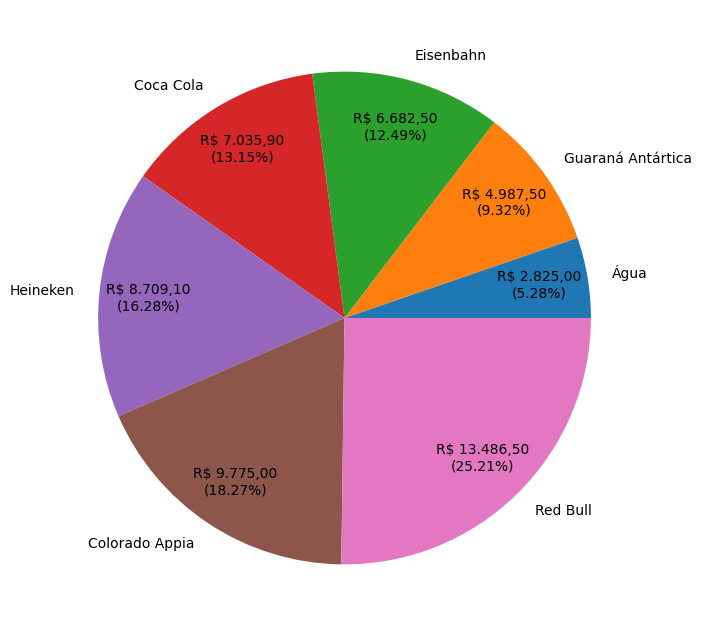

In [7]:
# string com a consulta a ser realizada no banco de dados
query = '''select p.nome, sum(i.preco_unitario * i.quantidade) faturamento
             from item_pedido i
             left join produto p on i.codigo_produto = p.codigo
            group by p.nome
            order by faturamento
        '''

# conecta no banco, realiza a consulta e pega os dados
with engine.connect() as conexao:
    resultado = conexao.execute(text(query))
    dados = resultado.mappings()

# cria o datagrame do Pandas com os dados do banco
df_faturamento_produtos = pd.DataFrame(dados)

# Converte o tipo do vetor FATURAMENTO do dataframe de object para float
df_faturamento_produtos['faturamento'] = df_faturamento_produtos['faturamento'].astype(float)

# Importa módulo para formatar números no padrão monetário
import locale
locale.setlocale(locale.LC_MONETARY, 'pt_BR')

# Calcula o total vendido para objter o quanto cada produto faturou
total = df_faturamento_produtos['faturamento'].sum()

# função que formata o texto para exibir o valor em reais e o percentual
def my_fmt(percentual):
    valor = total * percentual / 100
    valor = locale.currency(valor, symbol=False, grouping=True)
    return f'R$ {valor}\n({percentual:.2f}%)'

# plota gráfico
plt.figure(figsize=((10, 8)))
plt.pie(df_faturamento_produtos['faturamento'], labels=df_faturamento_produtos['nome'], autopct=my_fmt, pctdistance=0.8)

,faturamento,nome
0,2825.0,Água
1,4987.5,Guaraná Antártica
2,6682.5,Eisenbahn
3,7035.9,Coca Cola
4,8709.1,Heineken
5,9775.0,Colorado Appia
6,13486.5,Red Bull


([<matplotlib.patches.Wedge at 0x139d74be0>,
 [Text(1.084900196289091, 0.181635800688884, 'Água'),
  Text(0.8922969046597614, 0.6432777269069782, 'Guaraná Antártica'),
  Text(0.2837519779357012, 1.0627722310154597, 'Eisenbahn'),
  Text(-0.5699156830568664, 0.9408486138618826, 'Coca Cola'),
  Text(-1.0943251953978534, 0.1115901730326203, 'Heineken'),
  Text(-0.609285004597375, -0.9158448466704264, 'Colorado Appia'),
  Text(0.7727254303814168, -0.78287636906593, 'Red Bull')],
 [Text(0.7890183245738843, 0.13209876413737018, 'R$ 2.825,00\n(5.28%)'),
  Text(0.6489432033889173, 0.46783834684143866, 'R$ 4.987,50\n(9.32%)'),
  Text(0.20636507486232816, 0.7729252589203343, 'R$ 6.682,50\n(12.49%)'),
  Text(-0.4144841331322664, 0.6842535373540963, 'R$ 7.035,90\n(13.15%)'),
  Text(-0.795872869380257, 0.08115648947826931, 'R$ 8.709,10\n(16.28%)'),
  Text(-0.4431163669799091, -0.6660689793966738, 'R$ 9.775,00\n(18.27%)'),
  Text(0.561982131186485, -0.5693646320479491, 'R$ 13.486,50\n(25.21%)')])

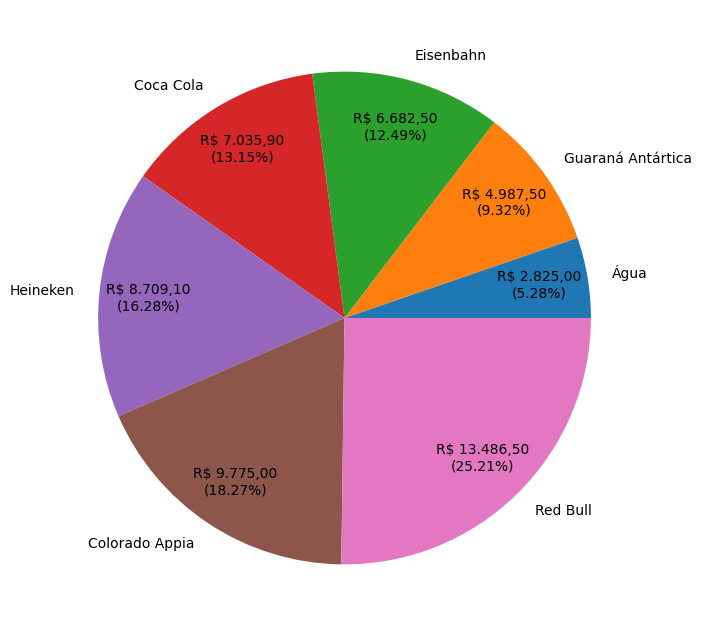